In [121]:
''' end to end model development for credit card project '''

' end to end model development for credit card project '

In [122]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold


**loading the data**

In [123]:
df = pd.read_csv('creditcard.csv')

**1.pre-processing stage**

In [124]:
df.sample(5)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
132565,0.0,0.711137,52.0,Male,West,6700.0,Rented,Officer1,Professional,0.0,0.603194,6700.0,12.0,0.0,2.0,0.0,1,Good
109998,0.0,0.037699,86.0,Male,South,7000.0,Ownhouse,Self_Emp,Matric,0.0,0.248107,7000.0,14.0,0.0,2.0,0.0,1.0,Good
29744,0.0,0.003708,51.0,Male,North,2608.0,Rented,Non-officer,Graduate,0.0,0.001533,2608.0,6.0,0.0,0.0,0.0,0.0,Good
138183,0.0,0.032931,66.0,Male,West,4600.0,Rented,Officer2,Professional,0.0,0.015431,4600.0,5.0,0.0,0.0,0.0,0,Good
31294,1.0,0.000000,50.0,Male,West,9830.0,Rented,Self_Emp,Matric,0.0,0.087478,9830.0,6.0,1.0,0.0,1.0,0.0,Bad


In [125]:
df.isnull().sum()

,0
NPA Status,2
RevolvingUtilizationOfUnsecuredLines,2
age,2
Gender,2
Region,2
MonthlyIncome,29733
Rented_OwnHouse,2
Occupation,2
Education,2
NumberOfTime30-59DaysPastDueNotWorse,2


In [126]:
df.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


when we observe the last 2 rows all columns are null values,so there is no problem in deleting the last two rows


In [127]:
df = df.drop([150000,150001],axis=0)
df.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149995,0.0,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0,Good
149996,0.0,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2,Good
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good


In [128]:
df.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,29731
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [129]:
df.info()               #to find complete information and type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

since, NumberOfDependents is numerical data but was in object type.we have to change into numeric type

In [130]:
df['NumberOfDependents']=pd.to_numeric(df['NumberOfDependents'])
df['NumberOfDependents'].dtype

dtype('float64')

splitting the data

In [131]:
X = df.iloc[: , :-1]
y = df.iloc[: ,-1]

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)



In [133]:
len(X_train),len(y_train)

(135000, 135000)

In [134]:
len(X_test),len(y_test)

(15000, 15000)

when we observe columns,we can see two similar column names "MonthlyIncome" and "MonthlyIncome.1".Let' check whether both values are same or not

In [135]:
X_train.index

Index([ 83022,  95205, 100780,   6760, 143321, 130148, 121680,  44409, 148743,
       114354,
       ...
        35541,  43595,  33201,  53922,  80232,  33867,  84434,  95816, 100879,
        89256],
      dtype='int64', length=135000)

In [136]:
#comparing "MonthlyIncome" and "MonthlyIncome.1"
c=[]
for i in X_train.index:
  if np.isnan(X_train["MonthlyIncome"][i]) == np.isnan(X_train["MonthlyIncome.1"][i]):
    pass
  elif X_train["MonthlyIncome"][i] == X_train["MonthlyIncome.1"][i]:
    pass
  else:
    c.append(i)
print(c)

[]


from the above result,we can say that both columns are same.so, we can remove one of the columns

In [137]:
X_train = X_train.drop(['MonthlyIncome.1'],axis=1)
X_test = X_test.drop(['MonthlyIncome.1'],axis=1)

In [138]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,26839
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


**2.Feature engineering stage**

1.Handling_missing_values

2.convertig categorical data to numerical data

3.Handling outliers

4.variable transformation

5.Feature scaling

1.Handling_missing_values

Here,we are using random_sample_imputation technique to handle missig values


In [139]:
X_train["MonthlyIncome"].dropna().sample(X_train["MonthlyIncome"].isnull().sum()).index

Index([  6928,  21012,  20167,   8922,  19310, 147878,  40127,  81737,  52866,
       119309,
       ...
         8853, 128085,  77924,  78591,   1403, 108063,  78020,  91257,  73512,
       107982],
      dtype='int64', length=26839)

In [140]:
#random_sample_imputation
def ran_sam(data,var):
  data[var+"_replaced"] = data[var].copy()
  s=data[var].dropna().sample(data[var].isnull().sum(),random_state=2)     # s is having the non-null values
  s.index = data[data[var].isnull()].index                    # we are asigning indices of null values to the indices of generated sample values
  data.loc[data[var].isnull(), var+'_replaced']=s                   # replacing sampled values into the nul values and staoring n new column


In [141]:
d=[X_train,X_test]
c=['MonthlyIncome','NumberOfDependents']
for i in d:
    for j in c:
        ran_sam(i, j)          #calling the above function



In [142]:
def p(x):
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  plt.title('MonthlyIncome')
  x['MonthlyIncome'].plot(kind='kde',color='r',label='og_MI')
  x['MonthlyIncome_replaced'].plot(kind='kde',color='g',label='rep_MI')
  plt.legend(loc = 0)

  plt.subplot(1,2,2)
  plt.title('NumberOfDependents')
  x['NumberOfDependents'].plot(kind='kde',color='r',label='og_ND')
  x['NumberOfDependents_replaced'].plot(kind='kde',color='g',label='rep_ND')
  plt.legend(loc = 0)


  print(x['MonthlyIncome'].std())
  print(x['MonthlyIncome_replaced'].std())
  print(x['NumberOfDependents'].std())
  print(x['NumberOfDependents_replaced'].std())
  plt.show()


14682.472385491685
16185.603471768003
1.1138683485157976
1.1138771974762927


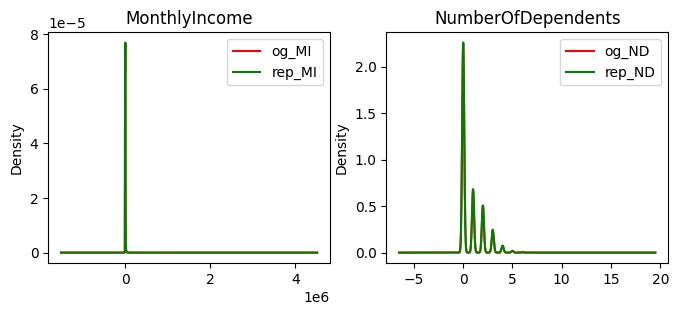

In [143]:
p(X_train)

11384.405689151827
11994.97116499528
1.126022699840668
1.1269317254813984


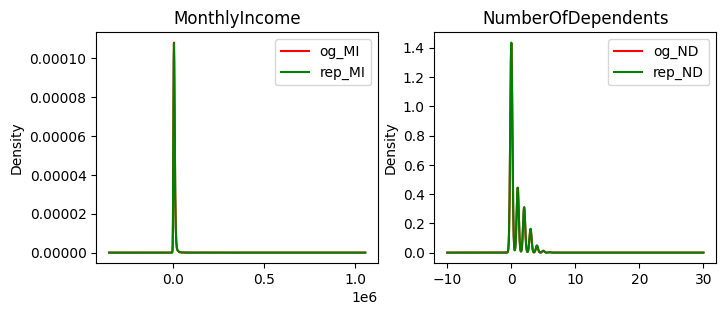

In [144]:
p(X_test)

removing the original columns having null values and keeping the replaced values

In [145]:
X_train=X_train.drop(['MonthlyIncome','NumberOfDependents'],axis=1)
X_test=X_test.drop(['MonthlyIncome','NumberOfDependents'],axis=1)

In [146]:
X_train.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0


In [147]:
X_test.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0


Now,we have zero null values in the data

2.converting categorical data into numerical data

we have to seperate the numerical values and categorical values

In [148]:
X_train_num_cols=X_train.select_dtypes(exclude='object')
X_train_cat_cols=X_train.select_dtypes(include='object')

In [149]:
X_test_num_cols=X_test.select_dtypes(exclude='object')
X_test_cat_cols=X_test.select_dtypes(include='object')


In [150]:
#converting X_train_cat_cols into num
X_train_cat_cols.head(5)

,Gender,Region,Rented_OwnHouse,Occupation,Education
83022,Male,Central,Ownhouse,Self_Emp,Professional
95205,Male,North,Ownhouse,Non-officer,Graduate
100780,Female,Central,Ownhouse,Non-officer,Graduate
6760,Male,South,Ownhouse,Self_Emp,Matric
143321,Male,South,Ownhouse,Self_Emp,Professional


Here,we have two types of caegorical data.

1.nominal: has equal priority [Gender,Region]

2.ordinal : allocates rank [Rented_OwnHouse,Occupation,Education]

In [151]:
X_train_cat_cols.reset_index(drop=True,inplace=True)

In [152]:
from sklearn.preprocessing import OneHotEncoder        # for nominal type
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(X_train_cat_cols[['Gender','Region']])

OneHotEncoder(handle_unknown='ignore')

In [153]:
f=one_hot.transform(X_train_cat_cols[['Gender','Region']]).toarray()
label_names=one_hot.get_feature_names_out()
print(f)
label_names

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


array(['Gender_Female', 'Gender_Male', 'Region_Central', 'Region_East',
       'Region_North', 'Region_South', 'Region_West'], dtype=object)

In [154]:
#creating data frame to get a fair data
v=pd.DataFrame(data=f,columns=one_hot.get_feature_names_out())
v

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,1.0,0.0,0.0
134996,0.0,1.0,1.0,0.0,0.0,0.0,0.0
134997,1.0,0.0,1.0,0.0,0.0,0.0,0.0
134998,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [155]:
#combining X_train_cat_cols with obtained data frame
X_train_cat_cols=pd.concat([X_train_cat_cols,v],axis=1)
X_train_cat_cols

,Gender,Region,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,Male,Central,Ownhouse,Self_Emp,Professional,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Male,North,Ownhouse,Non-officer,Graduate,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Female,Central,Ownhouse,Non-officer,Graduate,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Male,South,Ownhouse,Self_Emp,Matric,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Male,South,Ownhouse,Self_Emp,Professional,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134995,Male,North,Ownhouse,Self_Emp,PhD,0.0,1.0,0.0,0.0,1.0,0.0,0.0
134996,Male,Central,Ownhouse,Self_Emp,Graduate,0.0,1.0,1.0,0.0,0.0,0.0,0.0
134997,Female,Central,Rented,Self_Emp,Graduate,1.0,0.0,1.0,0.0,0.0,0.0,0.0
134998,Female,Central,Rented,Non-officer,Graduate,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [156]:
from sklearn.preprocessing import OrdinalEncoder

od_en = OrdinalEncoder()
od_en.fit(X_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])

OrdinalEncoder()

In [157]:
od_en.categories_

[array(['Ownhouse', 'Rented'], dtype=object),
 array(['Non-officer', 'Officer1', 'Officer2', 'Officer3', 'Self_Emp'],
       dtype=object),
 array(['Graduate', 'Matric', 'PhD', 'Post-Grad', 'Professional'],
       dtype=object)]

In [158]:
od_en.get_feature_names_out()

array(['Rented_OwnHouse', 'Occupation', 'Education'], dtype=object)

In [159]:
p=od_en.transform(X_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])
p_=pd.DataFrame(data=p)
p_.columns = od_en.get_feature_names_out()
p_

,Rented_OwnHouse,Occupation,Education
0,0.0,4.0,4.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,4.0,1.0
4,0.0,4.0,4.0
...,...,...,...
134995,0.0,4.0,2.0
134996,0.0,4.0,0.0
134997,1.0,4.0,0.0
134998,1.0,0.0,0.0


In [160]:
X_train_cat_cols = pd.concat([X_train_cat_cols,p_],axis=1)
X_train_cat_cols=X_train_cat_cols.drop(['Gender','Region','Rented_OwnHouse','Occupation','Education'],axis=1)
X_train_cat_cols=pd.concat([X_train_cat_cols,p_],axis=1)
X_train_cat_cols



,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
134995,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0
134996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
134997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
134998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [161]:
X_test_cat_cols.reset_index(drop=True,inplace=True)

In [162]:
#for test cat data nominal
f_ = one_hot.transform(X_test_cat_cols[['Gender','Region']]).toarray()




In [163]:
v_=pd.DataFrame(data=f_)             #dataframe for nominal
v_.columns=one_hot.get_feature_names_out()
v_.shape

(15000, 7)

In [164]:
#test data ordinal
p=od_en.transform(X_test_cat_cols[['Rented_OwnHouse','Occupation','Education']])
p_=pd.DataFrame(data=p)
p_.columns=od_en.get_feature_names_out()
p_.head()



,Rented_OwnHouse,Occupation,Education
0,1.0,0.0,0.0
1,1.0,3.0,3.0
2,0.0,1.0,3.0
3,1.0,0.0,0.0
4,1.0,1.0,4.0


In [165]:
X_test_cat_cols=pd.concat([v_,p_],axis=1)
X_test_cat_cols.shape



(15000, 10)

**working on numerical data**

3.Handling outliers

if any column or following normal distribution or gaussian distrbution,it has less outliers.Let's check.

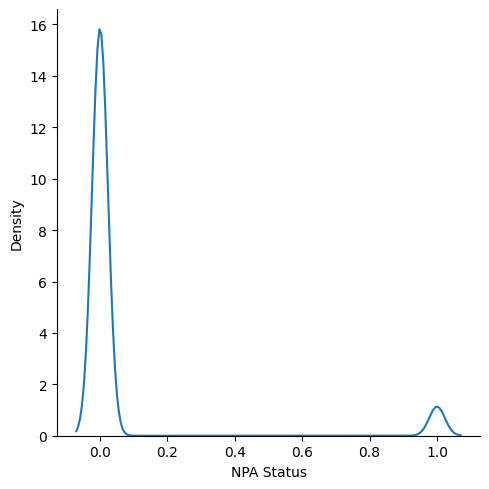

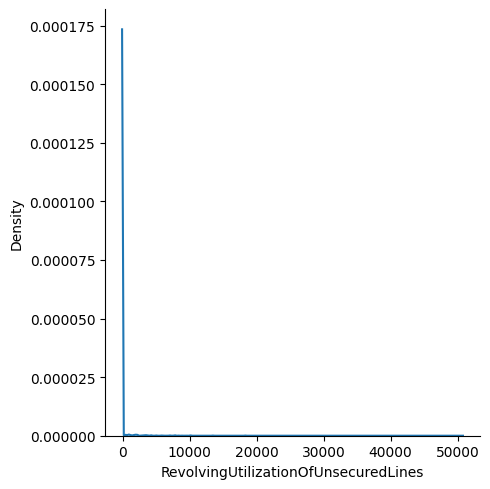

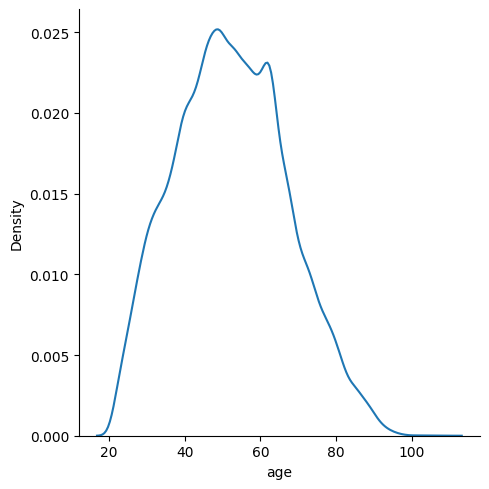

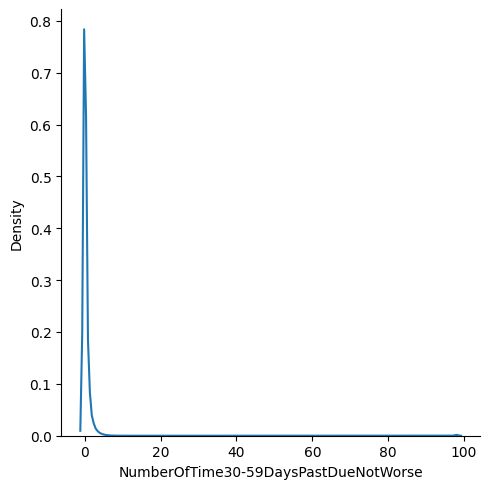

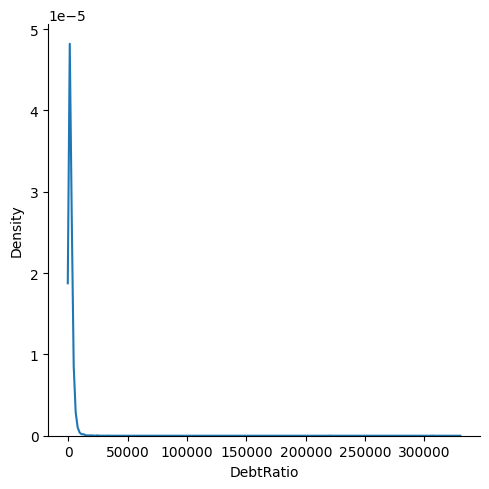

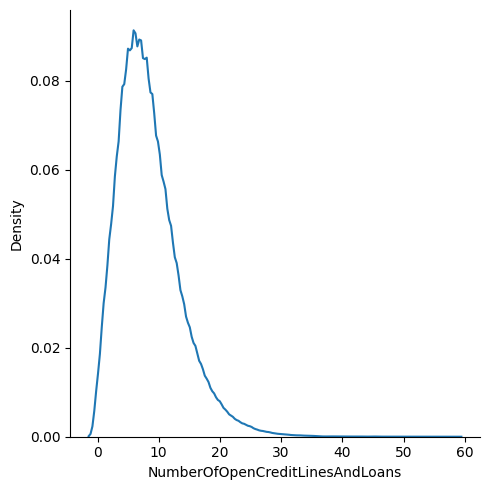

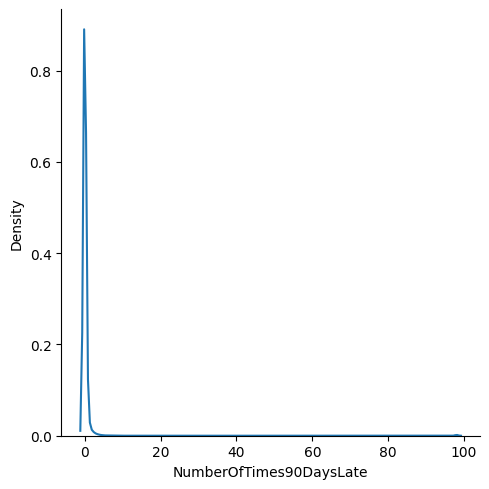

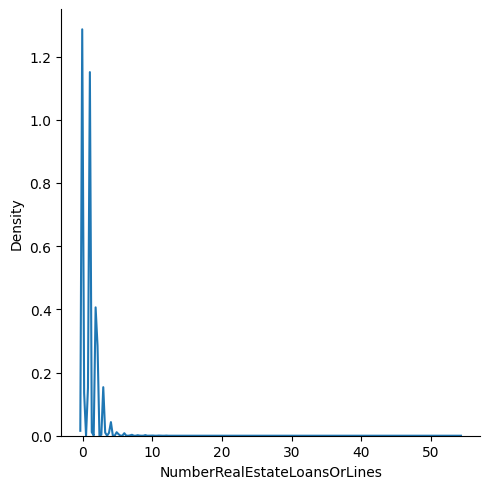

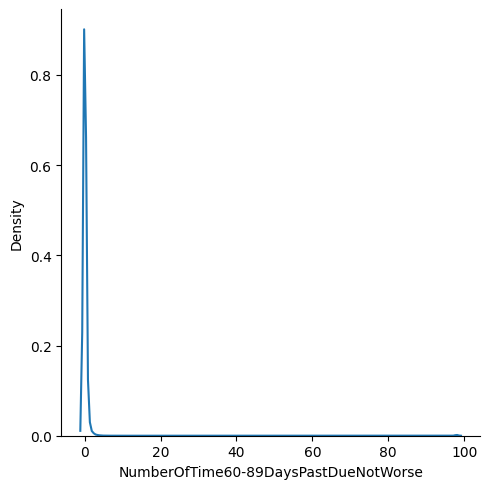

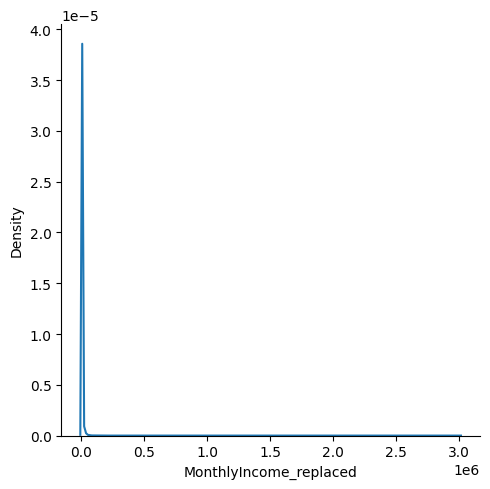

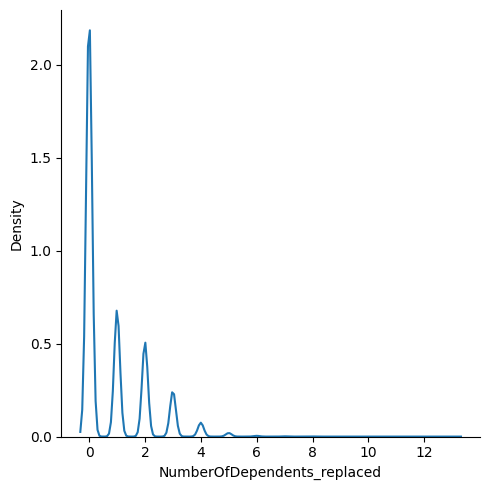

In [166]:
for i in X_train_num_cols:
  sns.displot(X_train_num_cols[i],kind='kde')

In [167]:
def fun(data_c,var):
  plt.figure(figsize = (12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')                        #for probplot ad remaining

  plt.subplot(1,3,2)
  sns.boxplot(x = data_c[var])

  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist='norm',plot = plt)
  plt.show()


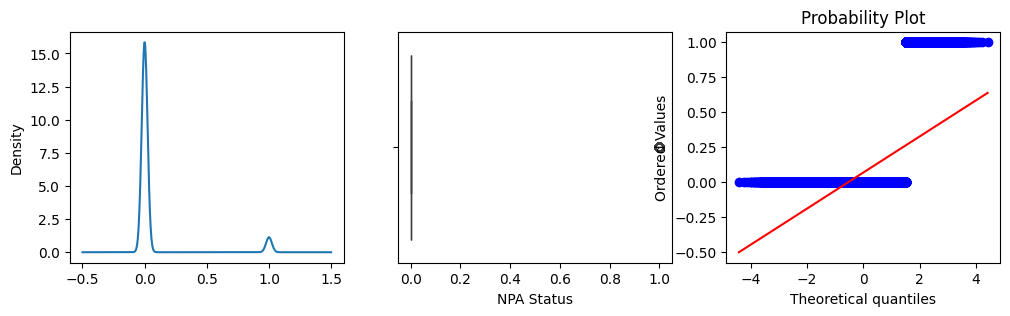

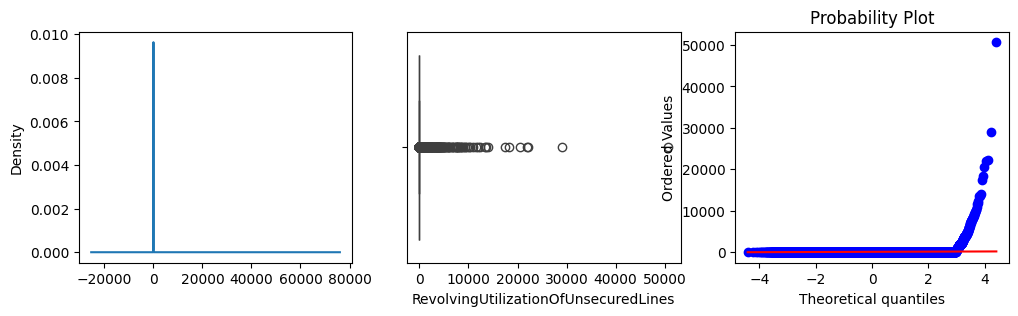

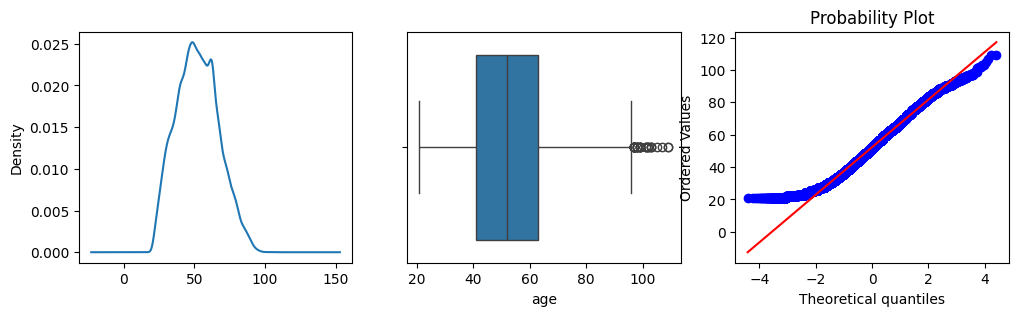

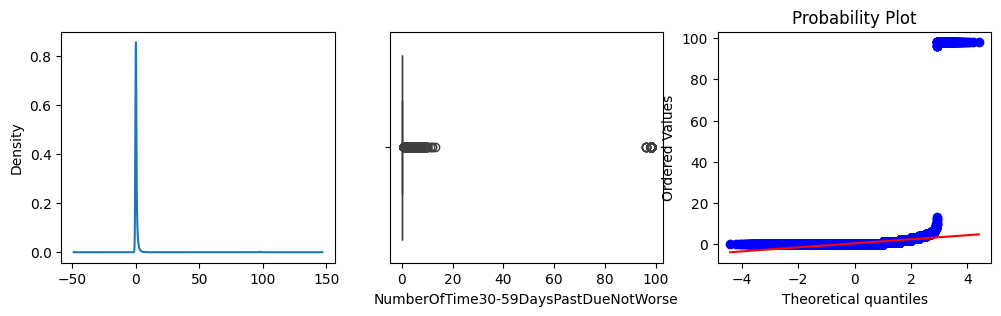

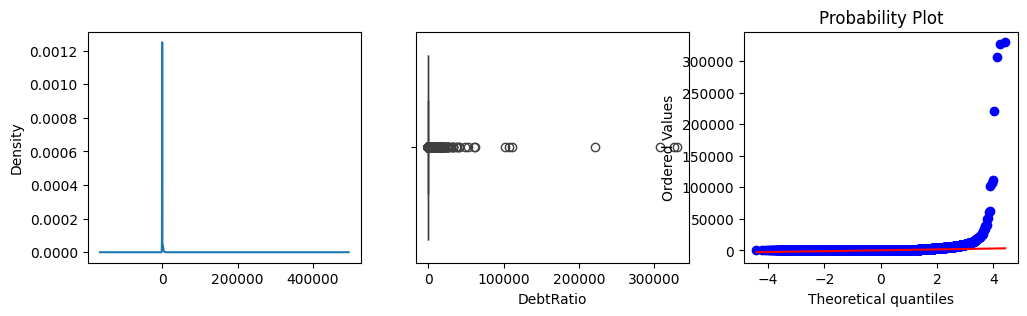

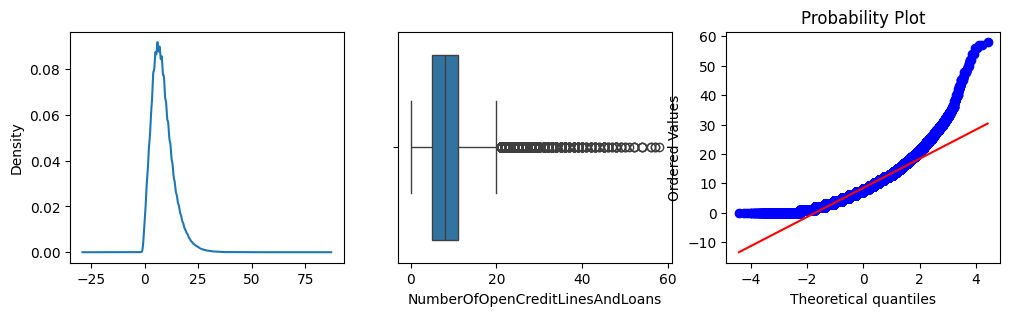

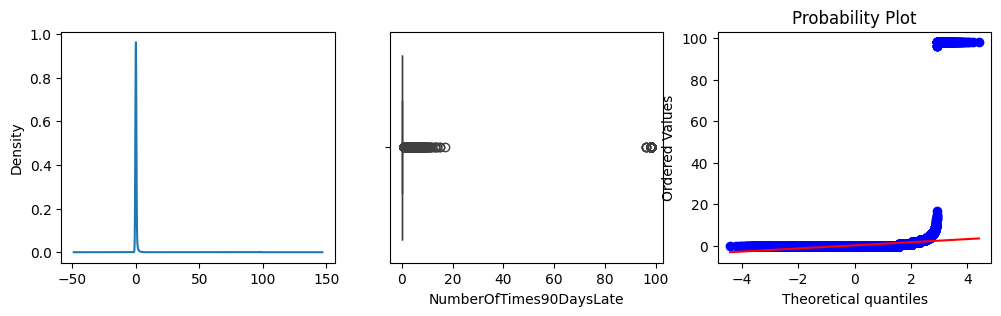

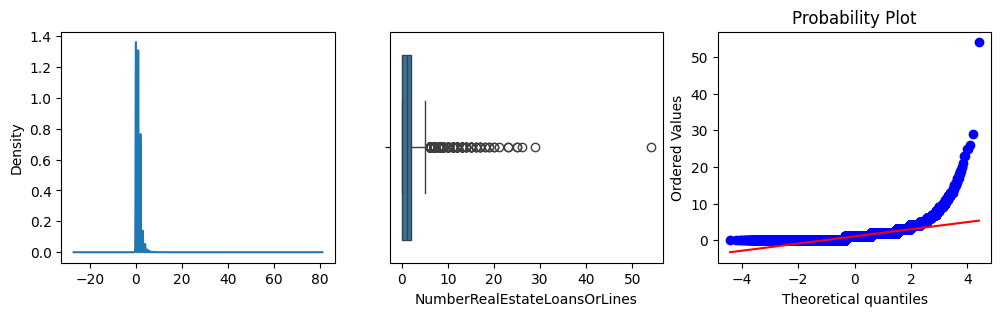

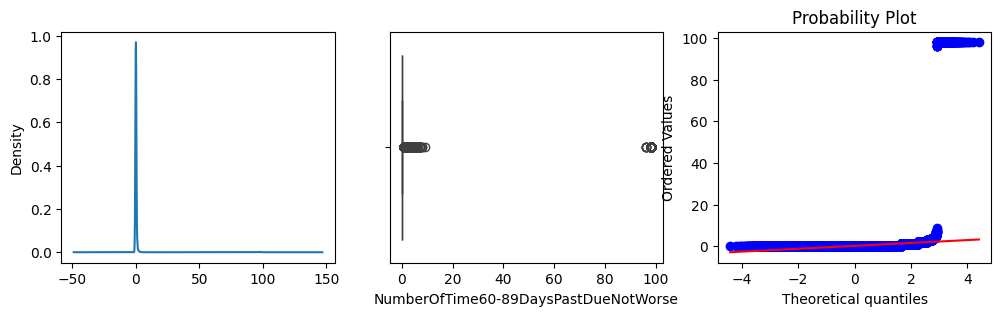

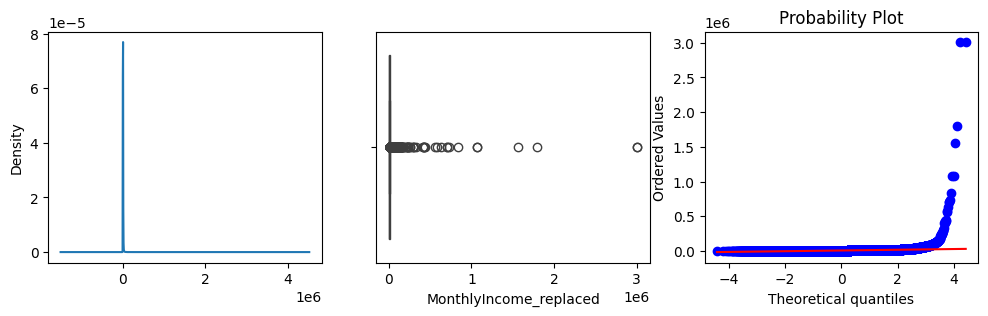

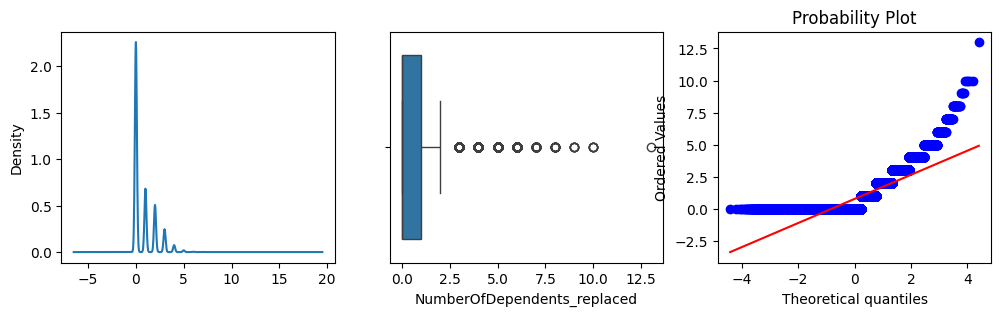

In [168]:
for i in X_train_num_cols.columns:
  fun(X_train_num_cols,i)

**variable transformation**

We are applying log technique to reduce the outliers

In [169]:
X_train_num_cols.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_replaced,NumberOfDependents_replaced
83022,0.0,0.051105,34.0,3.0,0.107315,7.0,0.0,0.0,0.0,6000.0,2.0
95205,1.0,1.000000,27.0,0.0,0.000000,0.0,0.0,0.0,0.0,2600.0,0.0
100780,0.0,0.576330,43.0,0.0,0.158526,3.0,0.0,0.0,0.0,3500.0,1.0
6760,0.0,941.000000,37.0,0.0,0.085183,6.0,0.0,0.0,0.0,5000.0,1.0
143321,0.0,0.233469,34.0,0.0,0.579671,9.0,0.0,2.0,0.0,4800.0,0.0


In [170]:
X_train_num_cols.shape

(135000, 11)

In [171]:
for i in X_train_num_cols.columns:
  X_train_num_cols[i+'_log'] = np.log(X_train_num_cols[i]+1)           #1 is adding because it should become zero

In [172]:
X_train_num_cols.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced',
       'NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

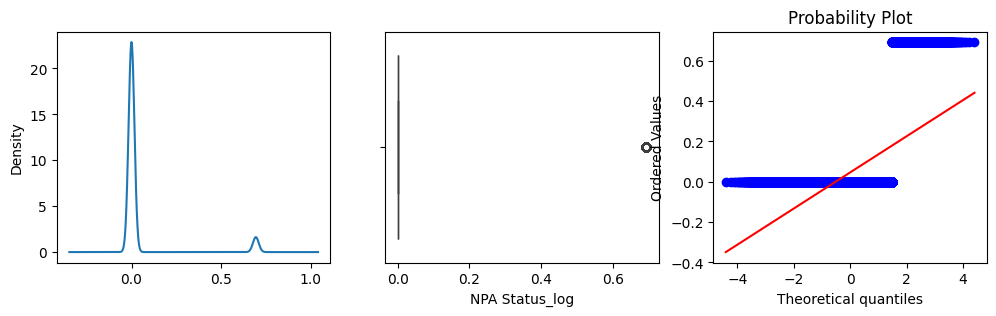

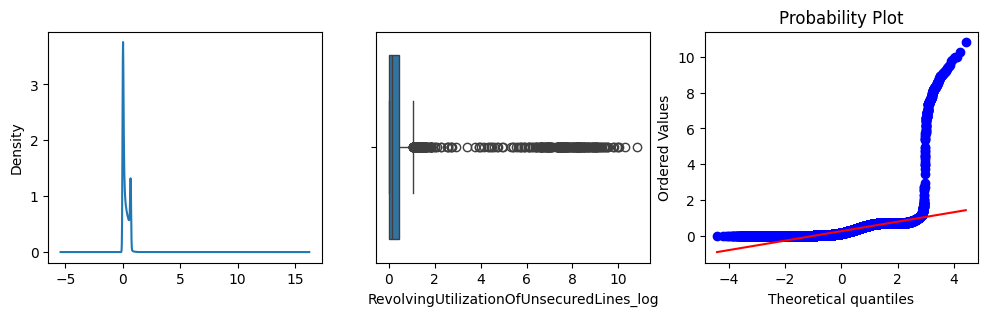

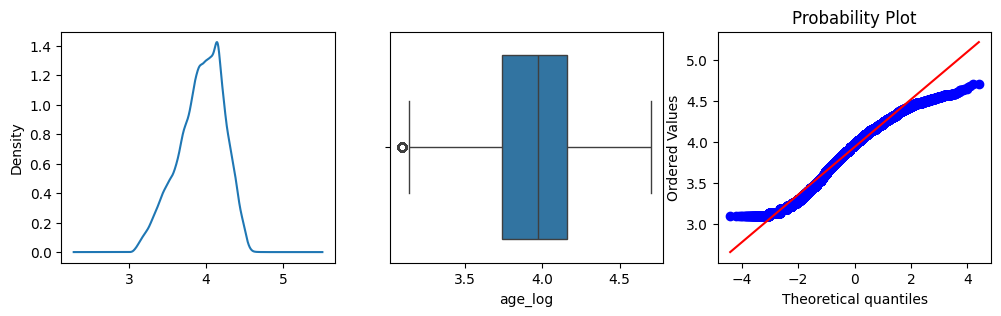

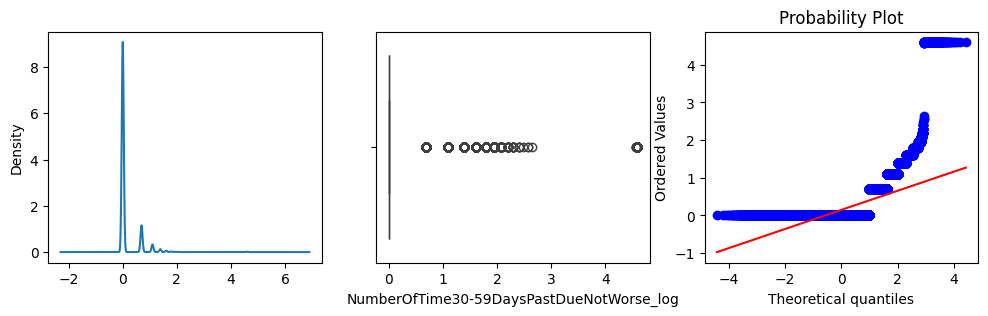

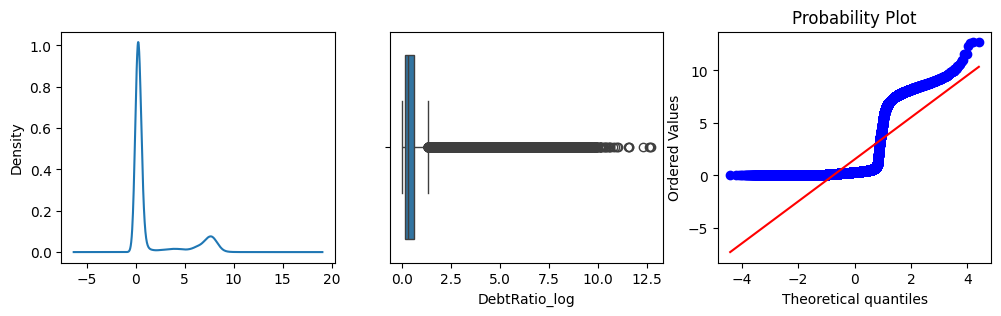

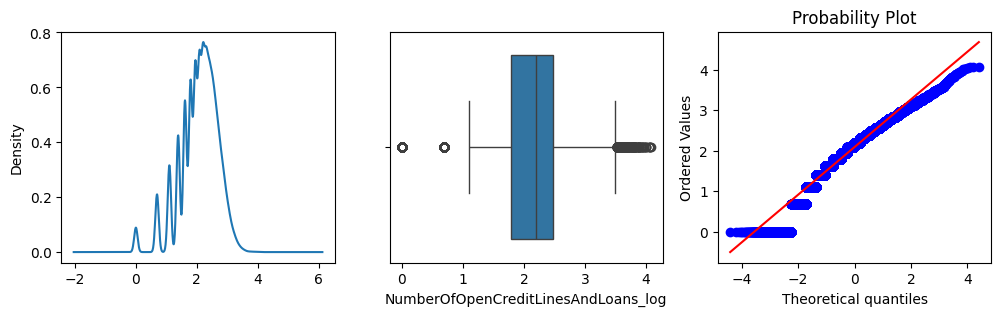

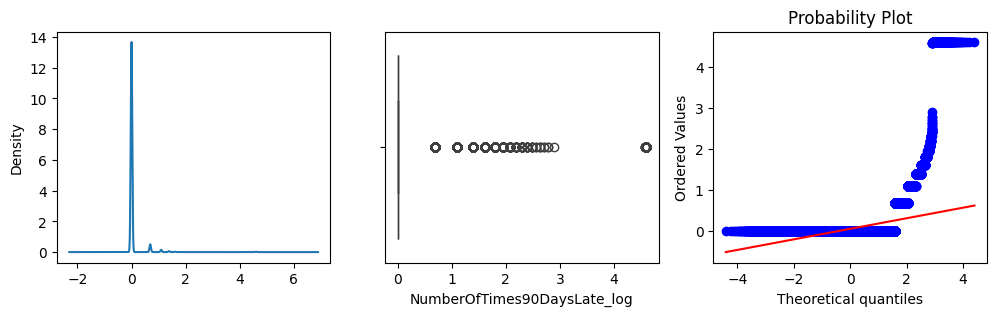

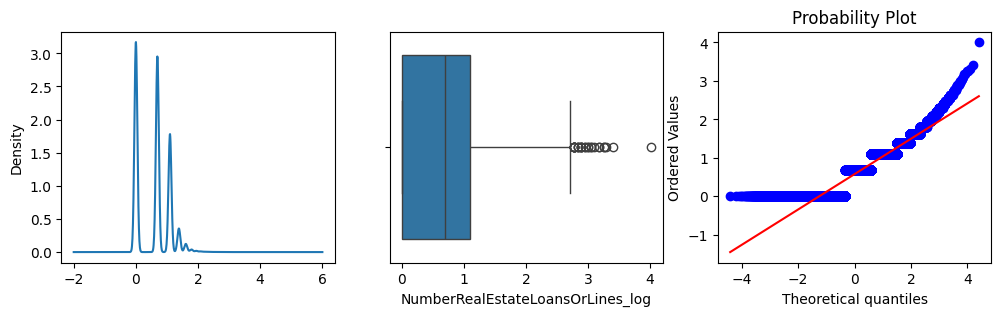

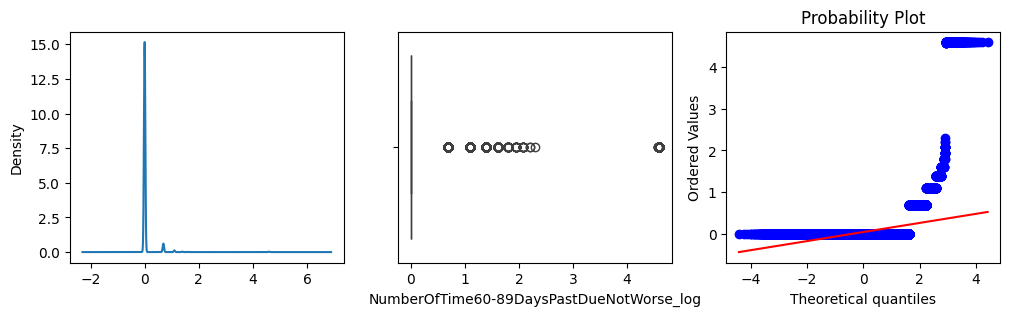

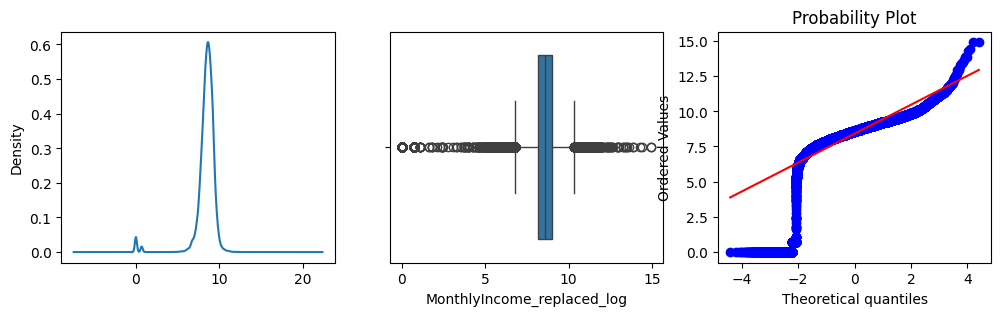

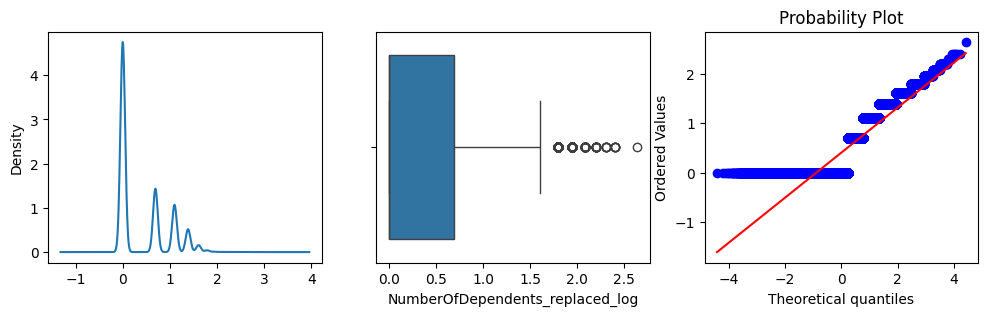

In [173]:
for i in X_train_num_cols.columns:
  if '_log' in i:
    fun(X_train_num_cols,i)     #to see the probplot for updated log values

In [174]:
for i in X_train_num_cols.columns:
  if '_log' not in i:
    X_train_num_cols=X_train_num_cols.drop(i,axis=1)
X_train_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

In [175]:
#applying same log technique on test data
for j in X_test_num_cols.columns:
  X_test_num_cols[j+'_log']=np.log(X_test_num_cols[j]+1)


In [176]:
for j in X_test_num_cols.columns:
  if '_log' not in j:
    X_test_num_cols=X_test_num_cols.drop(j,axis=1)
X_test_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

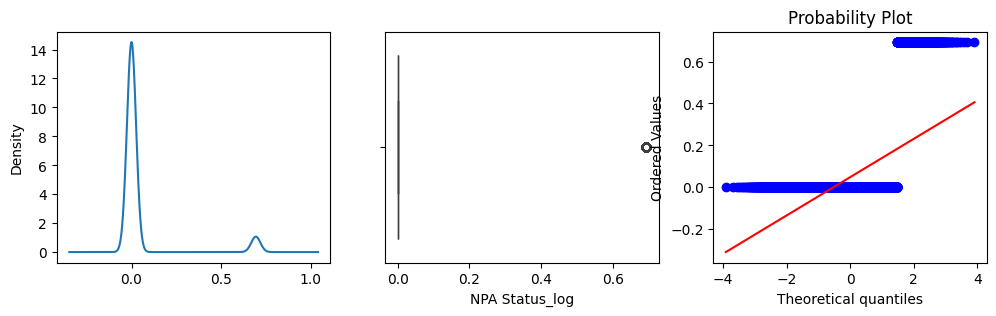

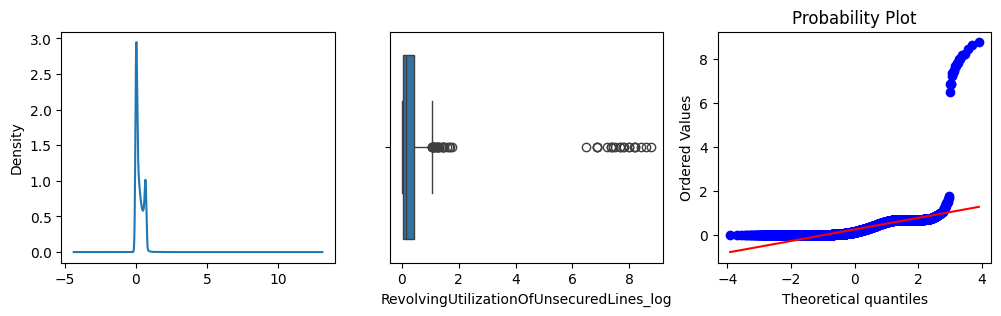

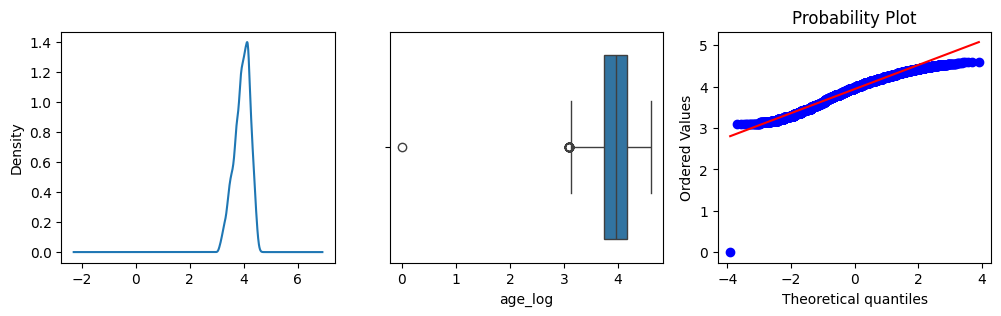

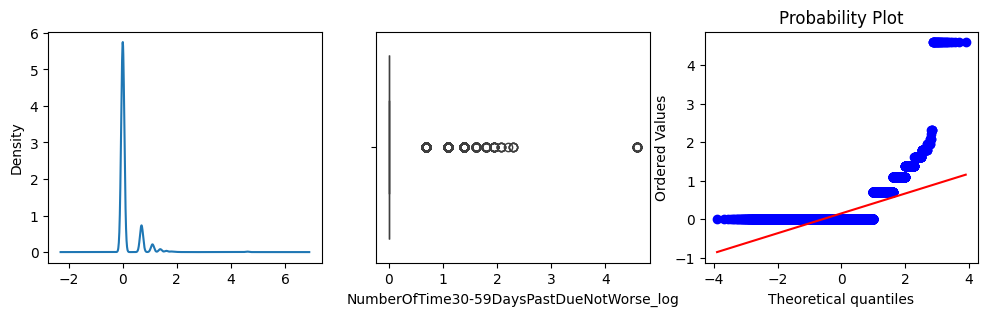

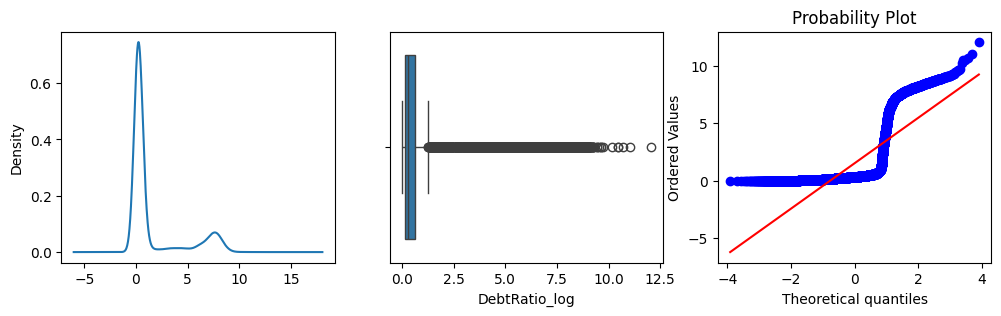

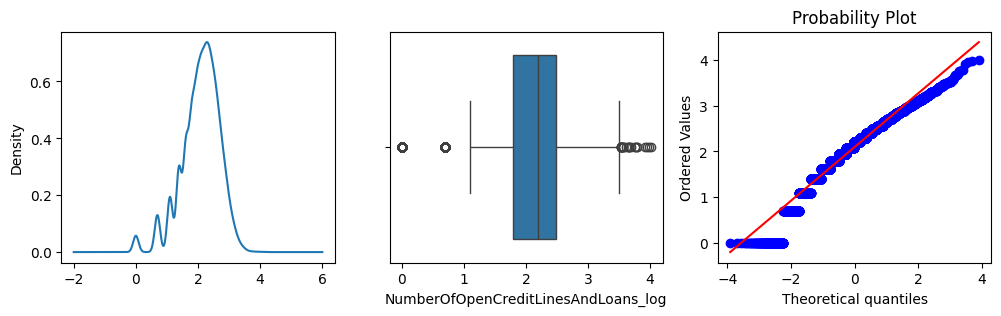

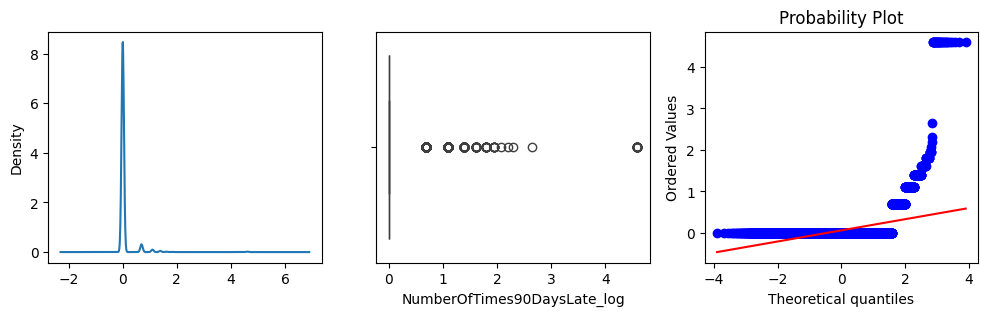

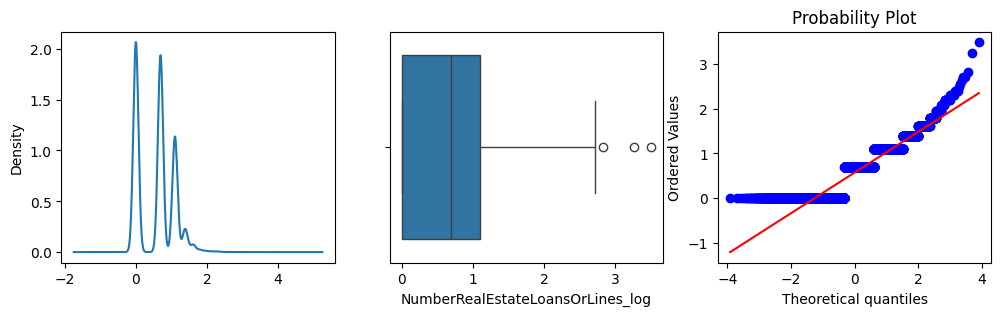

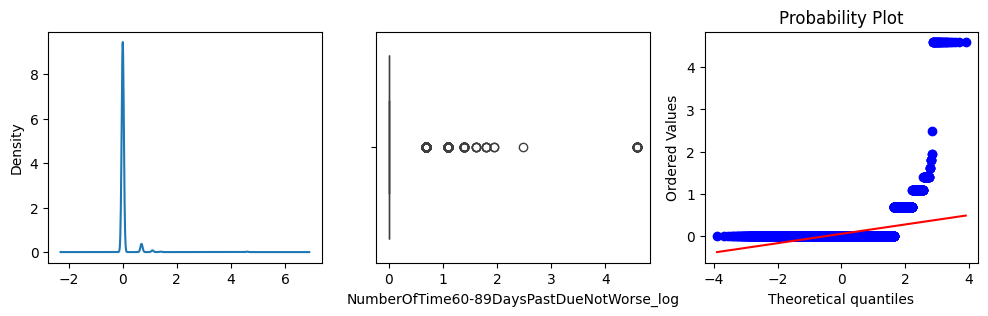

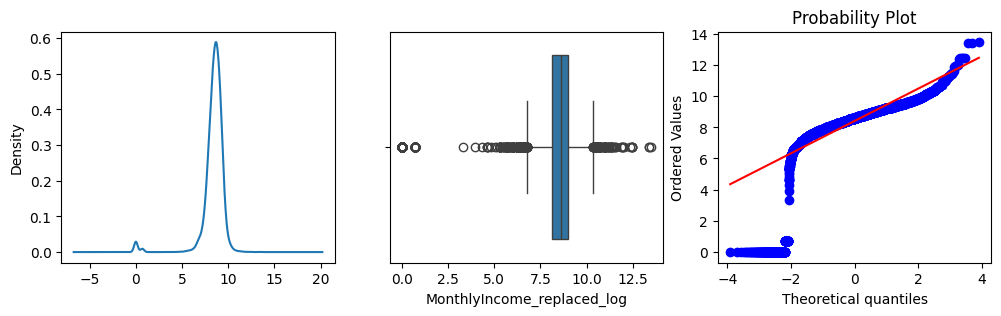

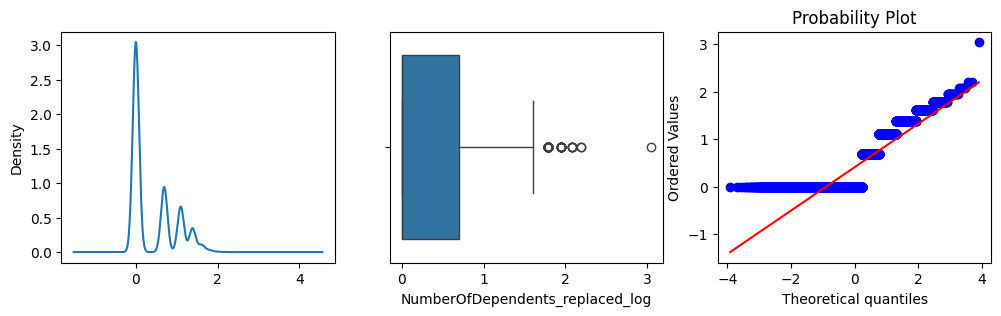

In [177]:
for j in X_test_num_cols:
  fun(X_test_num_cols,j)

**handling outliers**

In [178]:
def hand_outlrs(data,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=X_train_num_cols[var])
  plt.show()

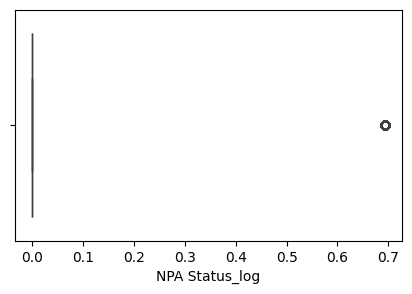

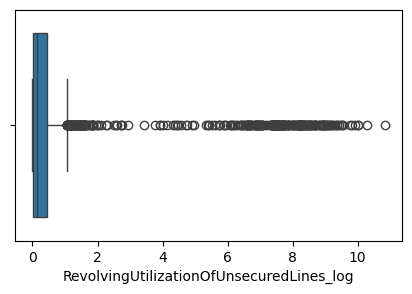

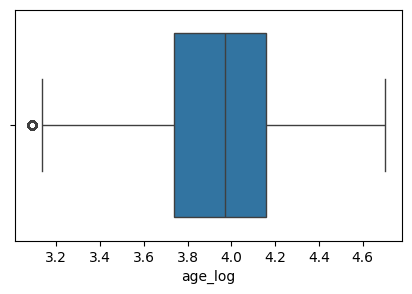

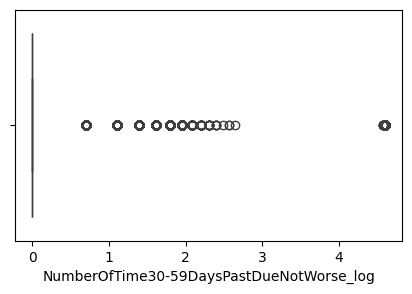

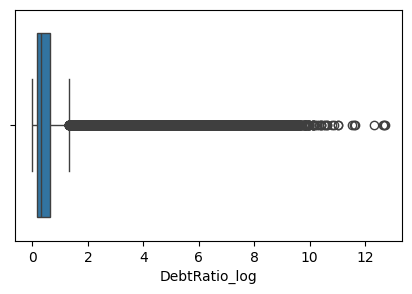

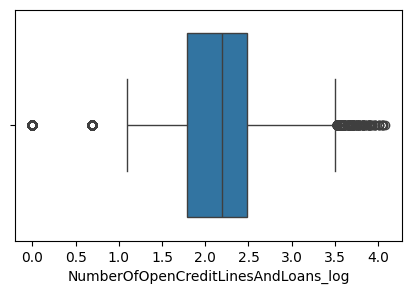

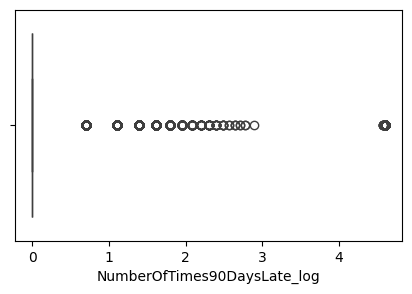

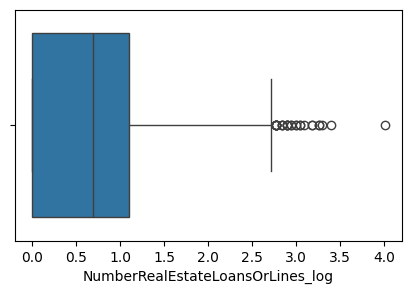

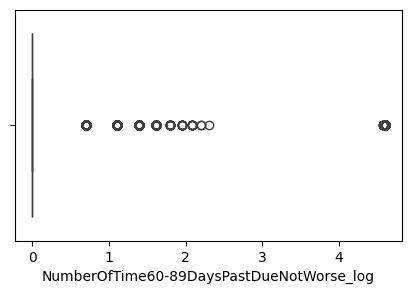

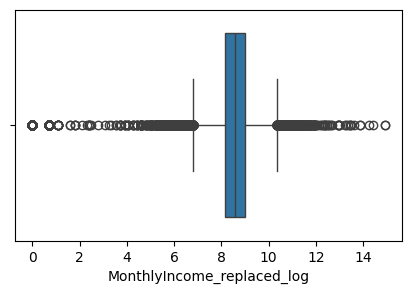

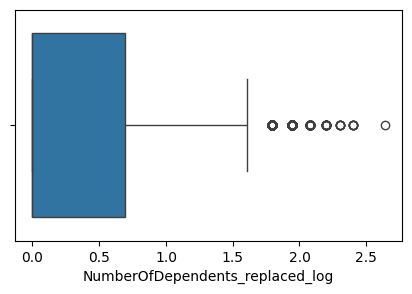

In [179]:
for i in X_train_num_cols.columns:
  hand_outlrs(X_train_num_cols,i)

In [180]:
# trimming on X_train_num_cols

def trim(data,var):
  iqr = data[var].quantile(0.75)-data[var].quantile(0.25)
  upper = data[var].quantile(0.75)+(1.5 * iqr)
  lower = data[var].quantile(0.25)-(1.5 * iqr)
  return upper,lower


In [181]:
for i in X_train_num_cols.columns:
  up,low=trim(X_train_num_cols,i)
  X_train_num_cols[i+'_trim']=np.where(X_train_num_cols[i]>up,up,np.where(X_train_num_cols[i]<low,low,X_train_num_cols[i]))


In [182]:
for i in X_train_num_cols.columns:
  if '_trim' not in i:
    X_train_num_cols.drop(i,axis=1)

X_train_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log',
       'NPA Status_log_trim', 'RevolvingUtilizationOfUnsecuredLines_log_trim',
       'age_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim'],
      dtype='object')

In [183]:
# trimming on X_test_num_cols

In [184]:
for i in X_test_num_cols.columns:
  up,low=trim(X_test_num_cols,i)
  X_test_num_cols[i+'_trim']=np.where(X_test_num_cols[i]>up,up,np.where(X_test_num_cols[i]<low,low,X_test_num_cols[i]))


In [185]:
for i in X_test_num_cols.columns:
  if '_trim' not in i:
    X_test_num_cols.drop(i,axis=1)

X_test_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log',
       'NPA Status_log_trim', 'RevolvingUtilizationOfUnsecuredLines_log_trim',
       'age_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim'],
      dtype='object')

In [186]:
X_train_num_cols = X_train_num_cols.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)


In [187]:
X_test_num_cols = X_test_num_cols.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)


In [188]:
X_test_num_cols.shape

(15000, 11)

In [189]:
X_train_num_cols.columns


Index(['NPA Status_log_trim', 'RevolvingUtilizationOfUnsecuredLines_log_trim',
       'age_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim'],
      dtype='object')

In [190]:
X_test_num_cols.columns

Index(['NPA Status_log_trim', 'RevolvingUtilizationOfUnsecuredLines_log_trim',
       'age_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim'],
      dtype='object')

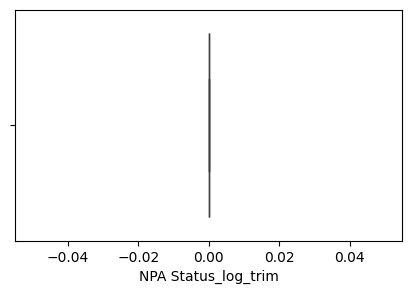

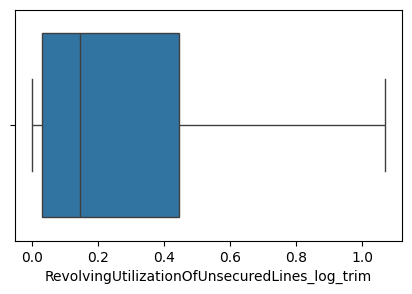

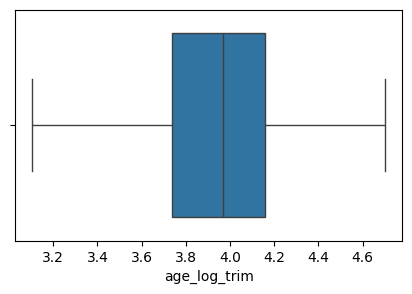

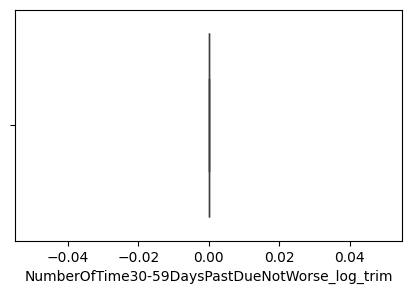

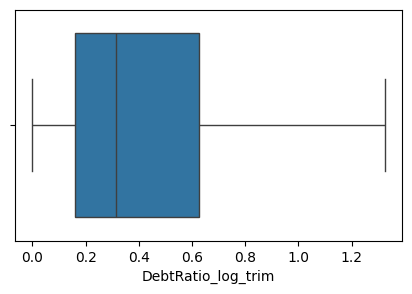

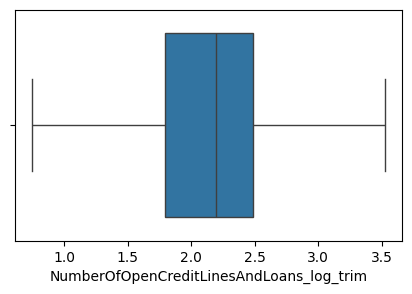

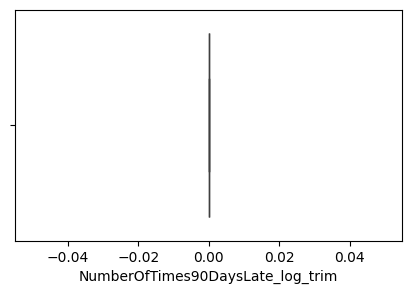

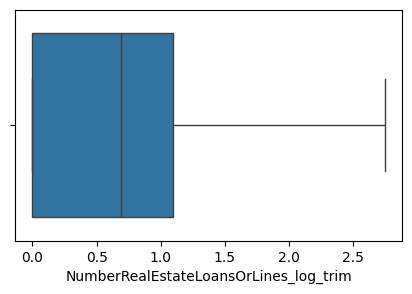

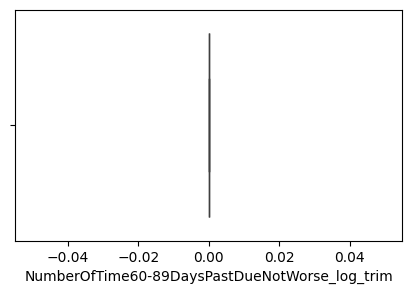

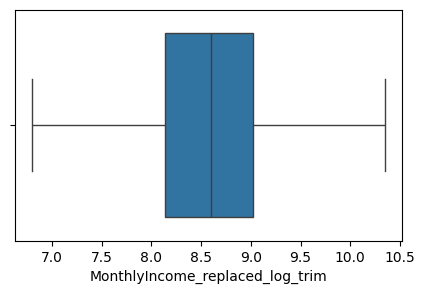

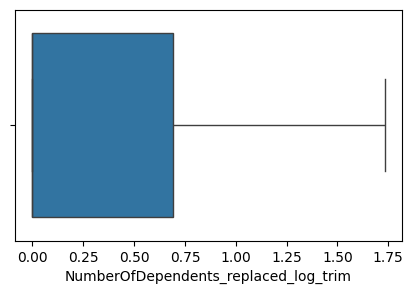

In [191]:
for j in X_train_num_cols.columns:
  hand_outlrs(X_train_num_cols,j)

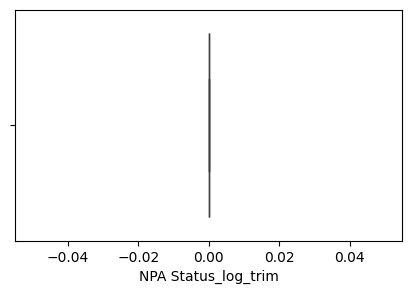

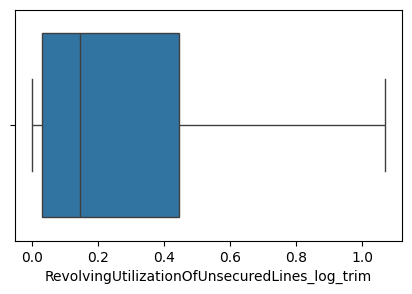

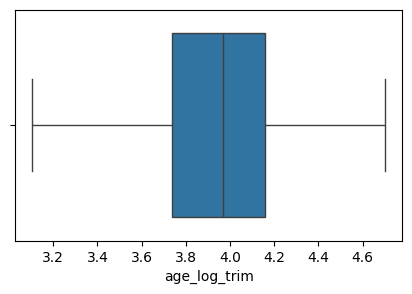

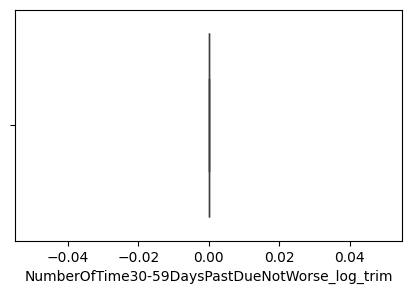

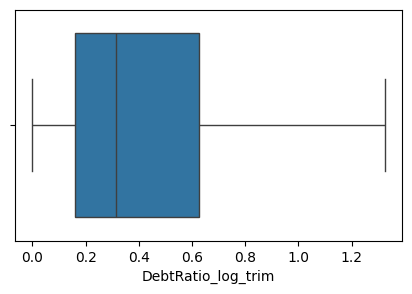

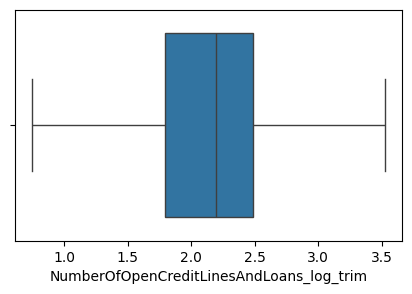

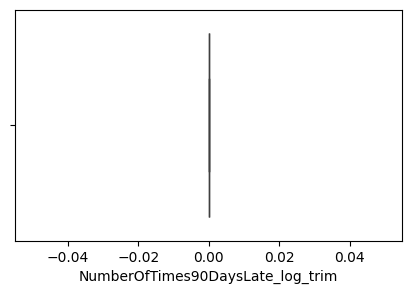

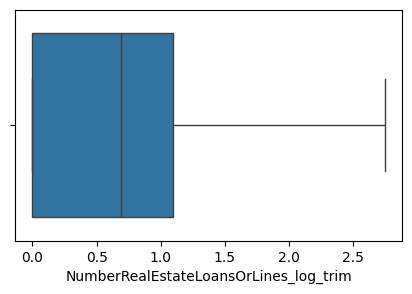

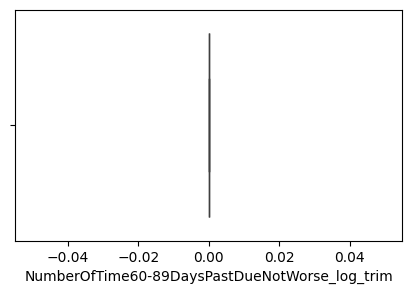

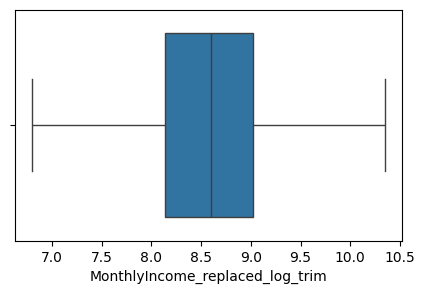

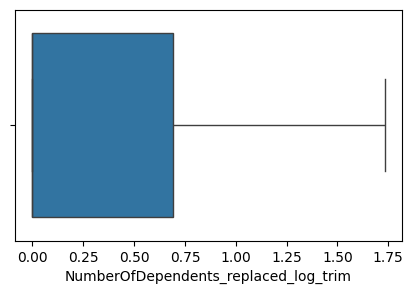

In [192]:
for j in X_test_num_cols.columns:
  hand_outlrs(X_test_num_cols,j)

In [193]:
X_train_num_cols.reset_index(drop=True, inplace=True)


In [194]:
# join the data as it is :

X_train_cleaned = pd.DataFrame()
X_train_cleaned = pd.concat([X_train_num_cols,X_train_cat_cols],axis=1)
X_train_cleaned.columns

Index(['NPA Status_log_trim', 'RevolvingUtilizationOfUnsecuredLines_log_trim',
       'age_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim', 'Gender_Female', 'Gender_Male',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse', 'Occupation', 'Education'],
      dtype='object')

In [195]:
X_train_cleaned.shape

(135000, 21)

In [196]:
X_test_num_cols.reset_index(drop=True, inplace=True)

In [197]:
# final test_data
X_test_cleaned = pd.DataFrame()
X_test_cleaned = pd.concat([X_test_num_cols,X_test_cat_cols],axis=1)
X_test_cleaned

,NPA Status_log_trim,RevolvingUtilizationOfUnsecuredLines_log_trim,age_log_trim,NumberOfTime30-59DaysPastDueNotWorse_log_trim,DebtRatio_log_trim,NumberOfOpenCreditLinesAndLoans_log_trim,NumberOfTimes90DaysLate_log_trim,NumberRealEstateLoansOrLines_log_trim,NumberOfTime60-89DaysPastDueNotWorse_log_trim,MonthlyIncome_replaced_log_trim,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.693147,4.174387,0.0,0.007660,1.945910,0.0,0.000000,0.0,7.863651,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.038951,4.127134,0.0,1.282110,2.197225,0.0,2.079442,0.0,8.922658,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0
2,0.0,0.682478,3.784190,0.0,0.637009,2.639057,0.0,1.098612,0.0,8.114624,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,0.0,0.241321,3.526361,0.0,0.354369,2.079442,0.0,0.693147,0.0,8.630700,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.090517,3.871201,0.0,0.313658,2.197225,0.0,0.693147,0.0,8.740497,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.384751,3.761200,0.0,0.155806,2.302585,0.0,0.000000,0.0,8.534837,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
14996,0.0,0.672391,3.367296,0.0,0.716309,2.639057,0.0,0.000000,0.0,7.234898,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
14997,0.0,0.207532,4.077537,0.0,0.214693,1.791759,0.0,0.000000,0.0,7.841100,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
14998,0.0,0.030382,4.094345,0.0,0.303160,1.098612,0.0,0.693147,0.0,8.671458,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [198]:
X_test_cleaned.shape

(15000, 21)

In [199]:
#to check the order of columns names
l=[]
for i,j in enumerate(X_train_cleaned.columns):
  if X_test_cleaned.columns[i]==j:
    pass
  else:
    l.append(j)
print(l)


[]


**Feature Selection**

Feature selection can be done in two ways:


1.Filter methods

   -constant

   -quasi constant
   
2.hypothesisi testing



In [200]:
#constant method : if variance of any column is equals to zero,that column can be removed

vt = VarianceThreshold(threshold=0.0)
vt.fit(X_train_cleaned)

VarianceThreshold()

In [201]:
sum(vt.get_support())

17

In [202]:
X_train_cleaned.columns[vt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_log_trim', 'age_log_trim',
       'DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim', 'Gender_Female', 'Gender_Male',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse', 'Occupation', 'Education'],
      dtype='object')

In [203]:
X_train_cleaned.columns[~vt.get_support()]

Index(['NPA Status_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim'],
      dtype='object')

In [204]:
X_train_cleaned=X_train_cleaned.drop(['NPA Status_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim'],axis=1)
X_test_cleaned=X_test_cleaned.drop(['NPA Status_log_trim', 'NumberOfTime30-59DaysPastDueNotWorse_log_trim',
       'NumberOfTimes90DaysLate_log_trim',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trim'],axis=1)

In [205]:
X_test_cleaned.shape

(15000, 17)

In [206]:
# quasi constant - varince should be 0.1
vqt = VarianceThreshold(threshold=0.1)
vqt.fit(X_train_cleaned)

VarianceThreshold(threshold=0.1)

In [207]:
sum(vqt.get_support())

15

In [208]:
X_train_cleaned.columns[vqt.get_support()]

Index(['DebtRatio_log_trim', 'NumberOfOpenCreditLinesAndLoans_log_trim',
       'NumberRealEstateLoansOrLines_log_trim',
       'MonthlyIncome_replaced_log_trim',
       'NumberOfDependents_replaced_log_trim', 'Gender_Female', 'Gender_Male',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse', 'Occupation', 'Education'],
      dtype='object')

In [209]:
X_train_cleaned.columns[~vqt.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_log_trim', 'age_log_trim'], dtype='object')

In [210]:
X_train_cleaned=X_train_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_log_trim', 'age_log_trim'],axis=1)
X_test_cleaned=X_test_cleaned.drop(['RevolvingUtilizationOfUnsecuredLines_log_trim', 'age_log_trim'],axis=1)

In [211]:
X_test_cleaned.shape

(15000, 15)

Now,we are remained with 15 columns.hypothesis testing s applied on these 15 columns and find the best columns for model development

In [212]:
y_train.head()

,Good_Bad
83022,Good
95205,Bad
100780,Good
6760,Good
143321,Good


In [213]:
#using label encoding technique we are converting into numbers

lbe = LabelEncoder()
lbe.fit(y_train)


LabelEncoder()

In [214]:
print(lbe.classes_)

['Bad' 'Good']


In [215]:
l = lbe.transform(y_train)
y_train_n = pd.DataFrame(data=l,columns=['target'])
y_test_n = pd.DataFrame(data=lbe.transform(y_test),columns=['target'])


In [216]:
cor=[]
for i in X_train_cleaned.columns:
  s=pearsonr(X_train_cleaned[i],y_train_n['target'])
  cor.append(s)
cor=np.array(cor)
cor

array([[-3.22722665e-03,  2.35720689e-01],
       [ 5.37756851e-02,  5.12929830e-87],
       [ 3.09354418e-02,  5.96517455e-30],
       [ 4.72349458e-02,  1.52539758e-67],
       [-4.51507363e-02,  7.23523644e-62],
       [ 6.11405885e-03,  2.46752718e-02],
       [-6.11405885e-03,  2.46752718e-02],
       [ 1.57523556e-01,  0.00000000e+00],
       [ 5.17811734e-02,  8.22867848e-81],
       [-2.26591719e-02,  8.32652724e-17],
       [-2.88610272e-03,  2.88956186e-01],
       [-2.03253414e-01,  0.00000000e+00],
       [-2.23703160e-03,  4.11115991e-01],
       [-2.13890765e-03,  4.31938687e-01],
       [ 3.65106067e-02,  4.66705077e-41]])

In [217]:
p_value = pd.Series(cor[:,1],index=X_train_cleaned.columns)
p_value

,0
DebtRatio_log_trim,2.357207e-01
NumberOfOpenCreditLinesAndLoans_log_trim,5.129298e-87
NumberRealEstateLoansOrLines_log_trim,5.965175e-30
MonthlyIncome_replaced_log_trim,1.525398e-67
NumberOfDependents_replaced_log_trim,7.235236e-62
Gender_Female,2.467527e-02
Gender_Male,2.467527e-02
Region_Central,0.000000e+00
Region_East,8.228678e-81
Region_North,8.326527e-17


In [218]:
k=[]
g=list(p_value)
for i in p_value:
  if i>0.05:
    k.append(g.index(i))
print(k)

[0, 10, 12, 13]


<Axes: >

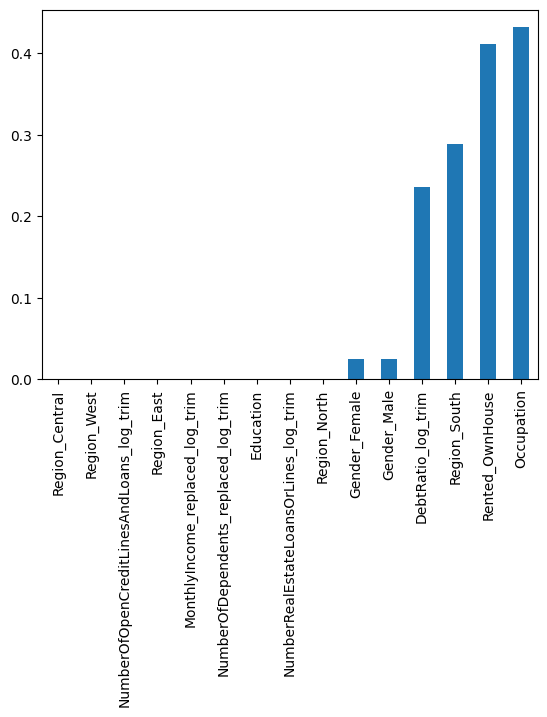

In [219]:
p_value.sort_values(ascending=True).plot.bar()

In [220]:
X_train_cleaned = X_train_cleaned.drop(['Rented_OwnHouse','Gender_Female',
                                        'Gender_Male','DebtRatio_log_trim','Occupation','Region_South'],axis=1)
X_test_cleaned = X_test_cleaned.drop(['Rented_OwnHouse','Gender_Female',
                                        'Gender_Male','DebtRatio_log_trim','Occupation','Region_South'],axis=1)

In [221]:
#after feature selection

X_train_cleaned.sample(5)

,NumberOfOpenCreditLinesAndLoans_log_trim,NumberRealEstateLoansOrLines_log_trim,MonthlyIncome_replaced_log_trim,NumberOfDependents_replaced_log_trim,Region_Central,Region_East,Region_North,Region_West,Education
83115,1.945910,0.693147,7.815207,0.000000,0.0,0.0,0.0,1.0,4.0
66937,1.386294,0.000000,9.028099,0.000000,1.0,0.0,0.0,0.0,0.0
2338,2.772589,1.386294,8.851950,0.000000,0.0,0.0,0.0,0.0,4.0
129889,2.079442,0.693147,7.697121,0.000000,0.0,0.0,1.0,0.0,3.0
45753,2.302585,0.000000,7.514800,0.693147,0.0,1.0,0.0,0.0,4.0


In [222]:
X_train_cleaned.shape

(135000, 9)

In [223]:
X_test_cleaned.sample(5)

,NumberOfOpenCreditLinesAndLoans_log_trim,NumberRealEstateLoansOrLines_log_trim,MonthlyIncome_replaced_log_trim,NumberOfDependents_replaced_log_trim,Region_Central,Region_East,Region_North,Region_West,Education
9306,0.752039,0.000000,6.784204,0.000000,0.0,0.0,1.0,0.0,3.0
14614,0.752039,0.000000,7.558517,1.609438,1.0,0.0,0.0,0.0,4.0
7359,1.945910,0.693147,9.059634,0.693147,0.0,0.0,0.0,1.0,0.0
11374,2.890372,0.693147,8.779711,0.000000,0.0,0.0,1.0,0.0,2.0
1767,2.397895,0.000000,8.949105,1.386294,0.0,0.0,0.0,0.0,1.0


In [224]:
X_test_cleaned.shape

(15000, 9)

In [225]:
y_train_n.value_counts()

,count
target,
1,126002
0,8998


In [226]:
y_train_n=np.array(y_train_n).ravel()
y_test_n=np.array(y_test_n).ravel()

In [227]:
!pip install imblearn

In [228]:
print("Labels count for Bad 0 = {}".format(sum(y_train_n == 0)))
print("Labels count for Good  1 = {} ".format(sum(y_train_n == 1)))

print()

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_up,y_train_up=sm.fit_resample(X_train_cleaned,y_train_n)

print("Labels count after for train Bad 0 = {} ".format(sum(y_train_up == 0)))
print("Labels count after for train Good 1 = {} ".format(sum(y_train_up == 1)))

Labels count for Bad 0 = 8998
Labels count for Good  1 = 126002 

Labels count after for train Bad 0 = 126002 
Labels count after for train Good 1 = 126002 


In [229]:
X_train_up.shape

(252004, 9)

**since,the data is balanced.we can develop the model**

In [230]:
def knn_algo(train_x,train_y,test_x,test_y):
  knn=KNeighborsClassifier(n_neighbors=5)      #default k value is 5
  knn.fit(train_x,train_y)

  y_train_pred=knn.predict(train_x)
  y_test_pred=knn.predict(test_x)

  print(f'Train accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

In [231]:
def log_algo(train_x,train_y,test_x,test_y):
  lr=LogisticRegression()
  lr.fit(train_x,train_y)

  y_train_pred=lr.predict(train_x)
  y_test_pred=lr.predict(test_x)

  print(f'Train accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

In [232]:
def nb_algo(train_x,train_y,test_x,test_y):
  nb=GaussianNB()
  nb.fit(train_x,train_y)

  y_train_pred=nb.predict(train_x)
  y_test_pred=nb.predict(test_x)

  print(f'Train accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

In [233]:
def dt_algo(train_x,train_y,test_x,test_y):
  dt=DecisionTreeClassifier()
  dt.fit(train_x,train_y)

  y_train_pred=dt.predict(train_x)
  y_test_pred=dt.predict(test_x)

  print(f'Train accuracy : {accuracy_score(train_y,y_train_pred)}')
  print(f'Test accuracy : {accuracy_score(test_y,y_test_pred)}')
  print(f'confusion Matrix : {confusion_matrix(test_y,y_test_pred)}')
  print(f'Classification Report : {classification_report(test_y,y_test_pred)}')

In [234]:
def call(train_x,train_y,test_x,test_y):
  print('KNN')
  knn_algo(train_x,train_y,test_x,test_y)
  print('log')
  log_algo(train_x,train_y,test_x,test_y)
  print('nb')
  nb_algo(train_x,train_y,test_x,test_y)
  print('dt')
  dt_algo(train_x,train_y,test_x,test_y)

In [235]:
call(X_train_up,y_train_up,X_test_cleaned,y_test_n)

KNN
Train accuracy : 0.9078586054189616
Test accuracy : 0.8109333333333333
confusion Matrix : [[  523   505]
 [ 2331 11641]]
Classification Report :               precision    recall  f1-score   support

           0       0.18      0.51      0.27      1028
           1       0.96      0.83      0.89     13972

    accuracy                           0.81     15000
   macro avg       0.57      0.67      0.58     15000
weighted avg       0.91      0.81      0.85     15000

log
Train accuracy : 0.7257503849145251
Test accuracy : 0.6668666666666667
confusion Matrix : [[ 827  201]
 [4796 9176]]
Classification Report :               precision    recall  f1-score   support

           0       0.15      0.80      0.25      1028
           1       0.98      0.66      0.79     13972

    accuracy                           0.67     15000
   macro avg       0.56      0.73      0.52     15000
weighted avg       0.92      0.67      0.75     15000

nb
Train accuracy : 0.6811042681862193
Test accuracy

In [236]:
k_values = np.arange(3,25,2)
k_values

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [237]:
test_acc = []
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_up,y_train_up)
  test_acc.append(knn.score(X_test_cleaned,y_test_n))
test_acc

[0.8291333333333334,
 0.8109333333333333,
 0.7970666666666667,
 0.7873333333333333,
 0.7801333333333333,
 0.7716,
 0.7658666666666667,
 0.7608,
 0.7558666666666667,
 0.7555333333333333,
 0.7525333333333334]